## Rövid Python puska

In [1]:
#fuggvenyek

def fgv(param1 = "default1", param2 = "default2"):
    return param1 + param2

#fuggvenyhivas
print(fgv("Hello ","World!"))

#if kapcsoló
if 1 > 2:
    print("nem hiszem el")
elif 1 > 3:
    print("még kevésbé hiszem el")
else:
    print("ezt már elhiszem")

# for loop
for i in range(5):
    print(i)

#lista
allataim = ["kutya","cica", "teknoc"]
for kiskedvenc in allataim:
    print(kiskedvenc)

Hello World!
ezt már elhiszem
0
1
2
3
4
kutya
cica
teknoc


# Qiskit kód puska a méréshez



In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.circuit.library.standard_gates import HGate, XGate, ZGate
import numpy as np

q = QuantumRegister(2,'q') #kvantumbiteket tartalmazó regiszter létrehozása (q[index]-el indexelhetőek az egyes bitek)
c = ClassicalRegister(2,'c') #klasszikus biteket tartalmazó regiszter (c[index]-el indexelhetőek az egyes bitek)

qc = QuantumCircuit(q,c) #kvantumhálózat készítése a regiszterekból

#kvantumbit állapotvektorának beállítása
state1 = Statevector([0.6,0.8]) #Állapotvektor megadása
qc.initialize(state1,qubits=q[0], normalize=True) #qubit beállítása

#kvantumkapuk
qc.h(q[0]) #H kapu
qc.x(q[0]) #X kapu
qc.z(q[0]) #Z kapu
qc.cx(q[0],q[1]) #CNOT kapu


#Állapotvektor kinyerése kvantumhálózatból
state_qc = Statevector(qc)

print(state_qc)

#mérés
qc.measure(q[0],c[0])

#klasszikusan vezérelt kapuk
#ch_gate = HGate().c_if(c[0],1) # vezérelt H kapu,  kapu aktív, ha a c[0]-s regiszterben '1'-es érték van
#qc.append(ch_gate, [q[1]])     #hálózathoz illesztés, a kapu q[1]-en operál
#cx_gate = XGate().c_if(c[0],1) # vezérelt X kapu,  kapu aktív, ha a c[0]-s regiszterben '1'-es érték van
#qc.append(cx_gate, [q[1]])     #hálózathoz illesztés, a kapu q[1]-en operál
#cz_gate = ZGate().c_if(c[0],1) # vezérelt Z kapu,  kapu aktív, ha a c[0]-s regiszterben '1'-es érték van
#qc.append(cz_gate, [q[1]])     #hálózathoz illesztés, a kapu q[1]-en operál
#klasszikusan vezérelt kapuk
with qc.if_test((qc.clbits[0], True)):
    qc.x(q[0])
with qc.if_test((qc.clbits[1], False)):
    qc.z(q[1])


#vizuális felosztás
qc.barrier(label = "Osztas itt")

qc.measure(q[1],c[1])
#hálózat rajzolása
qc.draw()



Statevector([-0.14142136+0.j,  0.        +0.j,  0.        +0.j,
             -0.98994949+0.j],
            dims=(2, 2))


┌─────────────────────┐┌───┐┌───┐┌───┐     ┌─┐                          »
q_0: ┤ Initialize(0.6,0.8) ├┤ H ├┤ X ├┤ Z ├──■──┤M├──────────────────────────»
     └─────────────────────┘└───┘└───┘└───┘┌─┴─┐└╥┘  ┌──────  ┌───┐ ───────┐ »
q_1: ──────────────────────────────────────┤ X ├─╫───┤ If-0  ─┤ Z ├  End-0 ├─»
                                           └───┘ ║   └──╥───  └───┘ ───────┘ »
                                                 ║ ┌────╨────┐               »
c: 2/════════════════════════════════════════════╩═╡ c_1=0x0 ╞═══════════════»
                                                 0 └─────────┘               »
«       ┌──────  ┌───┐ ───────┐  Osztas itt    
«q_0: ──┤ If-0  ─┤ X ├  End-0 ├──────░─────────
«       └──╥───  └───┘ ───────┘      ░      ┌─┐
«q_1: ─────╫─────────────────────────░──────┤M├
«     ┌────╨────┐                    ░      └╥┘
«c: 2/╡ c_0=0x1 ╞════════════════════════════╩═
«     └─────────┘                            1

In [3]:
from qiskit_aer import AerSimulator
from qiskit import transpile

#szimulátor kijelölse
#backend = AerSimulator.get_backend('qasm_simulator')

backend = AerSimulator()
job_sim = backend.run(transpile(qc, backend), shots=10, memory=True) # 10-szer ismételjük meg a kísérletet, hogy statisztikát kapjunk és elvégezzük a mérést
#mérési eredmény kinyerése
result_sim = job_sim.result() 
#mérési statisztikai kinyerése
counts = result_sim.get_counts()

print(counts) #mérési eredmények kiírása

#pontos mérési eredmények kinyerése listaként
mem = result_sim.get_memory() #összesített mérési eredmény

mem_first = [rec[0] for rec in mem] # csak az első vezetékhez tartozó mérési eredmény kinyerése
print(mem)
print(mem_first)


{'11': 4, '01': 6}
['01', '01', '01', '01', '01', '11', '01', '11', '11', '11']
['0', '0', '0', '0', '0', '1', '0', '1', '1', '1']


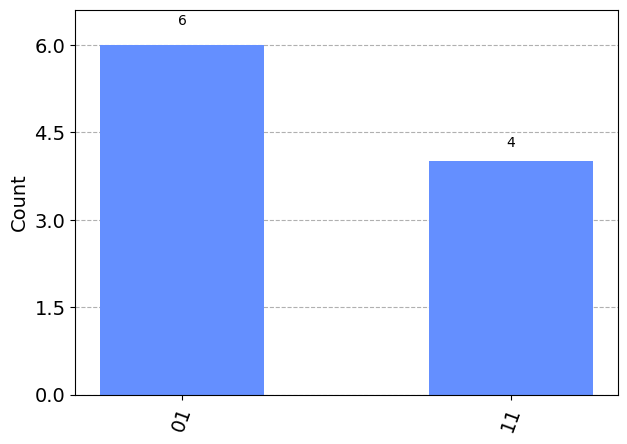

In [4]:
from qiskit.visualization import plot_histogram
#hisztogram rajzolás
plot_histogram(counts)


## Példa szimulációból állapotvektorok kinyerésére

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer

q = QuantumRegister(2,'q') #kvantumbiteket tartalmazó regiszter létrehozása (q[index]-el indexelhetőek az egyes bitek)
c = ClassicalRegister(2,'c') #klasszikus biteket tartalmazó regiszter (c[index]-el indexelhetőek az egyes bitek)

qc = QuantumCircuit(q,c) #kvantumhálózat készítése a regiszterekból


#kvantumkapuk
qc.h(q[0]) #H kapu
qc.cx(q[0],q[1]) #CNOT kapu

qc.save_statevector(label = 'mereselott', pershot = True)
#mérés
qc.measure(q[0],c[0])
qc.save_statevector(label = 'meresutan', pershot = True)

qc.measure(q[1],c[1])

qc.draw()




┌───┐      mereselott ┌─┐ meresutan    
q_0: ┤ H ├──■───────░──────┤M├─────░────────
     └───┘┌─┴─┐     ░      └╥┘     ░     ┌─┐
q_1: ─────┤ X ├─────░───────╫──────░─────┤M├
          └───┘     ░       ║      ░     └╥┘
c: 2/═══════════════════════╩═════════════╩═
                            0             1

In [46]:
from qiskit.quantum_info import partial_trace
from qiskit.quantum_info import DensityMatrix

qcirc = QuantumCircuit(1,1)
qcirc.x(0)
qcirc.h(0)
#qcirc.x(1)
qstate = Statevector(qcirc)
#density_mat = part

#traced_over_qubits = [1]            #qubits to trace over (qubits we're not interested in)
#partial_density_matrix = partial_trace(qstate, traced_over_qubits)
print(qstate)
print(DensityMatrix(qstate))
print(DensityMatrix(qstate).to_statevector())
#print(partial_density_matrix)
#print(partial_density_matrix.to_statevector())




#print(qstate)

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
DensityMatrix([[ 0.5+0.j, -0.5-0.j],
               [-0.5+0.j,  0.5+0.j]],
              dims=(2,))
Statevector([ 0.70710678-0.j, -0.70710678+0.j],
            dims=(2,))


In [3]:
from qiskit_aer import Aer
from qiskit import transpile

#szimulátor kijelölse
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc, backend), shots=10,memory=True) # 10-szer ismételjük meg a kísérletet, hogy statisztikát kapjunk és elvégezzük a mérést
#mérési eredmény kinyerése
result_sim = job_sim.result() 

print(result_sim.data(0)['mereselott'])
print(result_sim.data(0)['meresutan'])

[Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)), Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
  

# Mérési feladatok

### 1. Készítsen hálózatokat a négy nevezetes Bell állapot létrehozására! Készítsen hálózatot három kvantumbitből álló összefonódás létrehozására!

### 2. Készítse el a szupersűrűségű kódolás protokollját! Ellenőrizze a helyes működést!

In [7]:
superdense_message = [0,1]

#Hint: Mivel a qiskit klasszikus regiszterek közvetlen beállítását nem támogatja, az üzenet kódolásának két lehetséges módja ajánlott:
#1. Az üzenet függvényében készítünk el minden üzenethez új
#   kvantumhálózatot és nem használunk klasszikusan vezérelt kapukat.
#2. Klasszikusan vezérelt kvantumkapukat használunk, az üzenet bitjeit előzetes |0> vagy |1> qubit
#   megfelelelő klasszikus vezetékre történő mérésével állítjuk be

### 3.Készítse el a kvantumteleportációs protokollt! Ellenőrizze a helyes működést!

In [8]:
state_to_teleport = Statevector([0.6,0.8])

### 4. Készítsen kvantumos elven működő véletlenszámgenerátort! Készítse el a BB84 protokollt! Ellenőrizze a helyes működést legalább 20 bit titkos kulcs generálásával! 
(Bónusz feladat: Illesszen be támadót a rendszerbe és detektálja!)

In [4]:
qc = QuantumCircuit(2, 2)
qc.h(0)
with qc.if_test((qc.clbits[0], True)):
    qc.x(0)
with qc.if_test((qc.clbits[1], False)):
    qc.z(1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw()

┌───┐                            ┌──────  ┌───┐ ───────┐    ┌─┐
q_0: ┤ H ├────────────────────────────┤ If-0  ─┤ X ├  End-0 ├────┤M├
     └───┘  ┌──────  ┌───┐ ───────┐   └──╥───  └───┘ ───────┘ ┌─┐└╥┘
q_1: ───────┤ If-0  ─┤ Z ├  End-0 ├──────╫────────────────────┤M├─╫─
            └──╥───  └───┘ ───────┘      ║                    └╥┘ ║ 
          ┌────╨────┐               ┌────╨────┐                ║  ║ 
c: 2/═════╡ c_1=0x0 ╞═══════════════╡ c_0=0x1 ╞════════════════╩══╩═
          └─────────┘               └─────────┘                1  0